# Huzaifa 1973-2020 BSCS 8 
# Deep learning 
# Dr Shahid Munir
## Lenet Architecture implementation

In [23]:
import numpy as np

In [24]:
def convolve2d(image, kernel, stride, padding):
    kernel_height, kernel_width = kernel.shape
    padded_image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)
    
    output_height = (padded_image.shape[0] - kernel_height) // stride + 1
    output_width = (padded_image.shape[1] - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))
    
    for y in range(0, output_height):
        for x in range(0, output_width):
            output[y, x] = np.sum(
                kernel * padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width])
    return output


In [25]:
def average_pooling(feature_map, size, stride):
    height, width = feature_map.shape
    output_height = (height - size) // stride + 1
    output_width = (width - size) // stride + 1
    output = np.zeros((output_height, output_width))
    
    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.mean(
                feature_map[y*stride:y*stride+size, x*stride:x*stride+size])
    return output

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [27]:
def fully_connected(input_layer, weights, bias):
    return sigmoid(np.dot(input_layer, weights) + bias)

In [28]:
def lenet_forward_pass(image):
    # First Convolutional Layer
    C1 = convolve2d(image, np.random.rand(5, 5), stride=1, padding=0)
    S2 = average_pooling(C1, size=2, stride=2)
    # Second Convolutional Layer
    C3 = convolve2d(S2, np.random.rand(5, 5), stride=1, padding=0)
    S4 = average_pooling(C3, size=2, stride=2)
    # Flattening
    flattened = S4.flatten()
    # Fully Connected Layers
    F5 = fully_connected(flattened, np.random.rand(flattened.size, 120), np.random.rand(120))
    F6 = fully_connected(F5, np.random.rand(120, 84), np.random.rand(84))
    output = fully_connected(F6, np.random.rand(84, 10), np.random.rand(10))
    return output

In [29]:
test_image = np.random.rand(32, 32)  # Random 32x32 image
output = lenet_forward_pass(test_image)
print("Output from LeNet:", output)


Output from LeNet: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# -----Using Tensorflow-----

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [4]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to add a channel dimension (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values from 0-255 to 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encodings
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
def build_lenet():
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Flatten the output and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer

    return model


In [6]:
model = build_lenet()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))


C:\Users\huzai\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8193 - loss: 0.6067 - val_accuracy: 0.9688 - val_loss: 0.0951
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.0970 - val_accuracy: 0.9803 - val_loss: 0.0642
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9784 - loss: 0.0690 - val_accuracy: 0.9832 - val_loss: 0.0518
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9835 - loss: 0.0545 - val_accuracy: 0.9859 - val_loss: 0.0460
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9861 - loss: 0.0445 - val_accuracy: 0.9860 - val_loss: 0.0399
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9879 - loss: 0.0369 - val_accuracy: 0.9865 - val_loss: 0.0441
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9895 - loss: 0.0317 - val_accuracy: 0.9870 - val_loss: 0.0364
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0252 - val_accuracy: 0.

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 0s - 944us/step - accuracy: 0.9882 - loss: 0.0351
Test accuracy: 0.9882


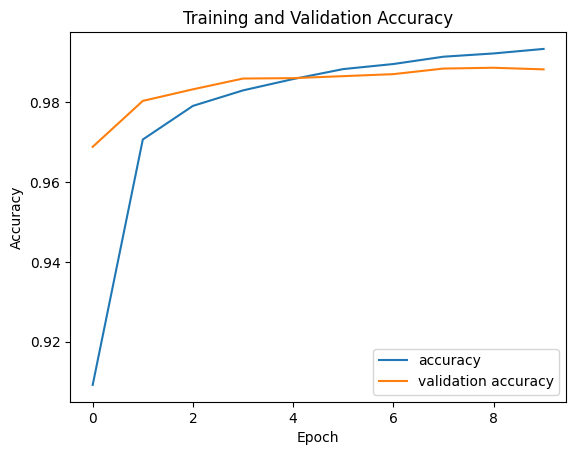

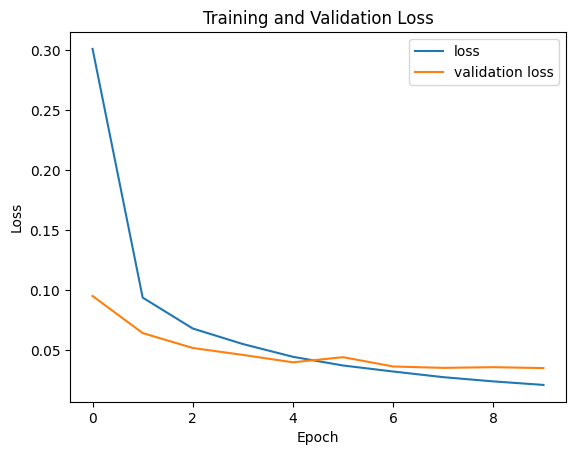

In [8]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [1]:
!pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
